In [2]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pickle as pkl
from matplotlib.ticker import (LogLocator)
from IPython.display import HTML
mpl.rcParams.update({'font.size': 14})

In [3]:
# Load PINN outputs
with open('pinn_loss.pkl', 'rb') as file:
    pinn_loss = pkl.load(file)
    
with open('boundary_loss.pkl', 'rb') as file:
    boundary_loss = pkl.load(file)
    
with open('predictions.pkl', 'rb') as file:
    predictions = pkl.load(file)
    
with open('f_boundary.pkl', 'rb') as file:
    f_boundary = pkl.load(file)
    
with open('p.pkl', 'rb') as file:
    p = pkl.load(file)
    
with open('T.pkl', 'rb') as file:
    T = pkl.load(file)
    
with open('r.pkl', 'rb') as file:
    r = pkl.load(file)

In [4]:
# Get properties
size = int(np.sqrt(predictions.shape[0]))
epochs = int(predictions.shape[2])

# Take out of logspace
f_boundary = np.exp(f_boundary)
p = np.exp(p)
T = np.exp(T)
r = np.exp(r)
# predictions = np.exp(predictions)

final_predict = predictions[:, :, -1].reshape((size, size))
final_predict = np.exp(final_predict)

# Check data
print(f'F_boundary shape: {f_boundary.shape}, max: {np.max(f_boundary)}')
print(f'Predictions shape: {predictions.shape}, max: {np.max(predictions[:, :, -1].reshape((size, size))[-1, :-1])}')
print(f'Final_predict shape: {final_predict.shape}, max: {np.max(final_predict[-1, :-1])}')

F_boundary shape: (512, 1), max: 643.4857747295018
Predictions shape: (262144, 1, 1000), max: 4.400754451751709
Final_predict shape: (512, 512), max: 81.51234260215452


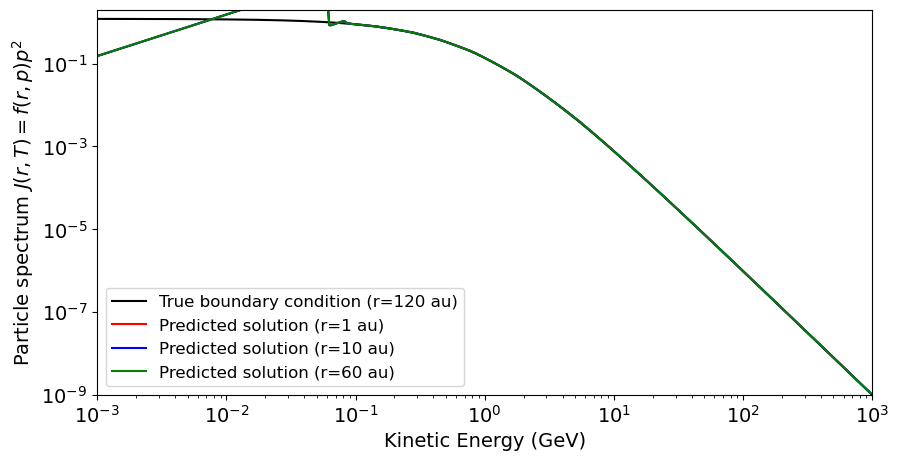

In [6]:
# Plot J(r, T)
fig, ax = plt.subplots(figsize=(10, 5))

ax.loglog(T, f_boundary*(p**2), label='True boundary condition (r=120 au)', c='k')
ax.loglog(T[:-1], np.expand_dims(final_predict[0, :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=1 au)', c='red')
ax.loglog(T[:-1], np.expand_dims(final_predict[int(size/12), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=10 au)',c ='blue')
ax.loglog(T[:-1], np.expand_dims(final_predict[int(size/2), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=60 au)', c='green')
ax.loglog(T[:-1], np.expand_dims(final_predict[-1, :-1], axis=1)*(p[:-1]**2), label='Predicted boundary condition (r=120 au)', c='orange')

ax.set_xlabel("Kinetic Energy (GeV)")
ax.set_ylabel("Particle spectrum $J(r, T) = f(r, p) p^2$")
ax.set_xlim(1e-3, 1e3)
ax.set_ylim(1e-9, 2e0)
ax.legend(prop={'size': 12})

plt.savefig('prediction.png')

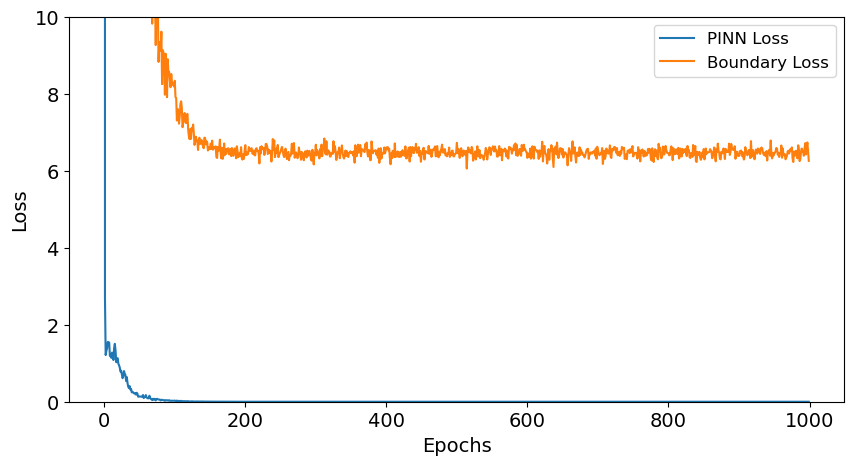

In [11]:
# Plot loss 
fig = plt.figure(figsize=(10, 5))

plt.plot(pinn_loss, label='PINN Loss')
plt.plot(boundary_loss, label='Boundary Loss')

plt.ylim(0, 10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(prop={'size': 12})
plt.savefig("loss.png")

In [ ]:
# Animate J(r, T) over the epochs
for i in range(epochs):
    if (i%50 == 0):
        fig, ax = plt.subplots(figsize=(10, 5))
        
        ax.set_title("Epoch " + str(i))
        ax.set_xlabel("Kinetic Energy (GeV)")
        ax.set_ylabel("Particle spectrum $J(r, T) = f(r, p) p^2$")
        ax.set_xlim(1e-3, 1e3)
        ax.set_ylim(1e-9, 2e0)
        ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))
        ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))
    
        ax.loglog(T, f_boundary*(p**2), label='True boundary condition (r=120 au)')
        ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[0, :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=1 au)')
        ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[int(size/12), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=10 au)')
        ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[int(size/2), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=60 au)')
        ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[-1, :-1], axis=1)*(p[:-1]**2), label='Predicted boundary condition (r=120 au)')
        
        ax.legend(prop={'size': 12})

In [ ]:
# Animate J(r, T) over the epochs
fig, ax = plt.subplots(figsize=(10, 5))

ims = []
for i in range(epochs):
    if i == 0:
        ax.set_xlabel("Kinetic Energy (GeV)")
        ax.set_ylabel("Particle spectrum $J(r, T) = f(r, p) p^2$")
        ax.set_xlim(1e-3, 1e3)
        ax.set_ylim(1e-9, 2e0)
        
        ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))
        ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='all'))
    
    txt = plt.text(0.5, 0.95, f"Epoch: {i}", transform=ax.transAxes, ha="center", color='w')
    
    ax.loglog(T, f_boundary*(p**2), label='True boundary condition (r=120 au)')
    ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[0, :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=1 au)')
    ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[int(size/12), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=10 au)')
    ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[int(size/2), :-1], axis=1)*(p[:-1]**2), label='Predicted solution (r=60 au)')
    im = ax.loglog(T[:-1], np.expand_dims(predictions[:, :, i].reshape((size, size))[-1, :-1], axis=1)*(p[:-1]**2), label='Predicted boundary condition (r=120 au)')
    
    ax.legend(prop={'size': 12})
    
    ims.append([im, txt])
        
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_jshtml())